In [53]:
import sys
import numpy as np
import pandas as pd
from fingerprints.get_fp import output, input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
%matplotlib inline

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split


In [62]:
labels_kmeans = pd.read_csv('data/labels_kmeans.csv').set_index('CID')
labels_manual = pd.read_csv('data/labels_manual.csv').set_index('CID')
labels_hrc = pd.read_csv('data/labels_hrc.csv').set_index('CID')
fingerprint = input

In [55]:
from sklearn.model_selection import StratifiedKFold

def kfold_cv(X, y, k, H, cv_fun, random_state):
    """
    Do stratified k-fold cross-validation with a dataset, to check how a model behaves as a function
    of the values in H (eg. a hyperparameter such as tree depth, or polynomial degree).

    :param X: feature matrix.
    :param y: response column.
    :param k: number of folds.
    :param H: values of the hyperparameter to cross-validate.
    :param cv_fun: function of the form (X_train, y_train, X_valid, y_valid, h) to evaluate the model in one split,
        as a function of h. It must return a dictionary with metric score values.
    :param random_state: controls the pseudo random number generation for splitting the data.
    :return: a Pandas dataframe with metric scores along values in H.
    """
    kf = StratifiedKFold(n_splits = k, shuffle = True, random_state = random_state)
    scores = []  # to store global results

    # for each value h in H, do CV
    for h in H:
        
        # for each fold 1..K
        kk = 0
        for train_index, valid_index in kf.split(X, y):
            kk = kk+1
            # partition the data in training and validation
            X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

            # call cv_fun to train the model and compute performance
            fold_scores = {'_h': h, '_fold': kk}
            fold_scores.update(cv_fun(X_train, y_train, X_valid, y_valid, h))
            scores.append(fold_scores)
            
    return pd.DataFrame(scores)

## kmeans

In [56]:
y = labels_kmeans
X = fingerprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54321)


In [57]:
m_rf = RandomForestClassifier(n_estimators = 10, max_features = 3).fit(X_train, y_train)
y_pred = m_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.17478510028653296 

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       231
           1       0.66      0.37      0.48       145
           2       0.44      0.11      0.17        75
           3       0.85      0.91      0.88       578
           4       0.65      0.31      0.42       107
           5       0.59      0.32      0.42       180
           6       0.53      0.46      0.49        81
           7       0.73      0.60      0.66       272
           8       0.48      0.21      0.29       175

   micro avg       0.73      0.57      0.64      1844
   macro avg       0.62      0.43      0.49      1844
weighted avg       0.69      0.57      0.61      1844
 samples avg       0.78      0.62      0.65      1844



c:\Users\Ikhlasse\anaconda3\envs\SML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


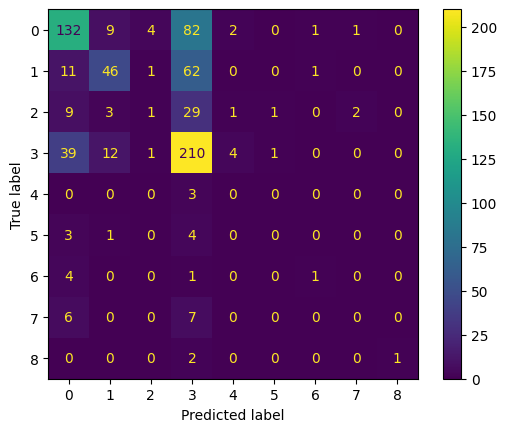

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

## manual

In [59]:
y = labels_manual
X = fingerprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54321)

In [60]:
m_rf = RandomForestClassifier(n_estimators = 10, max_features = 3).fit(X_train, y_train)
y_pred = m_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.10315186246418338 

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       347
           1       0.58      0.35      0.44       239
           2       0.70      0.40      0.51       231
           3       0.63      0.34      0.44       197
           4       0.65      0.44      0.52       228
           5       0.64      0.51      0.57       231
           6       0.56      0.17      0.26        53
           7       0.52      0.31      0.38       111
           8       0.55      0.41      0.47       249

   micro avg       0.65      0.44      0.53      1886
   macro avg       0.62      0.40      0.48      1886
weighted avg       0.64      0.44      0.52      1886
 samples avg       0.59      0.47      0.49      1886



c:\Users\Ikhlasse\anaconda3\envs\SML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


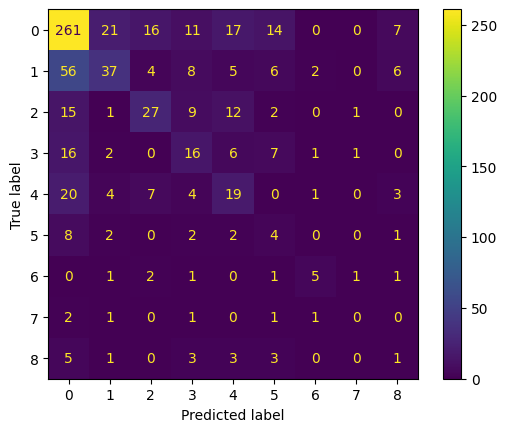

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

## hrc

In [63]:
y = labels_hrc
X = fingerprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54321)


In [64]:
m_rf = RandomForestClassifier(n_estimators = 10, max_features = 3).fit(X_train, y_train)
y_pred = m_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.19340974212034384 

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       231
           1       0.65      0.37      0.47       145
           2       0.53      0.12      0.20        75
           3       0.84      0.93      0.88       578
           4       0.53      0.21      0.31       107
           5       0.66      0.37      0.48       180
           6       0.54      0.48      0.51        81
           7       0.75      0.66      0.70       272
           8       0.45      0.19      0.27       175

   micro avg       0.74      0.58      0.65      1844
   macro avg       0.63      0.44      0.49      1844
weighted avg       0.70      0.58      0.62      1844
 samples avg       0.78      0.64      0.66      1844



c:\Users\Ikhlasse\anaconda3\envs\SML\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


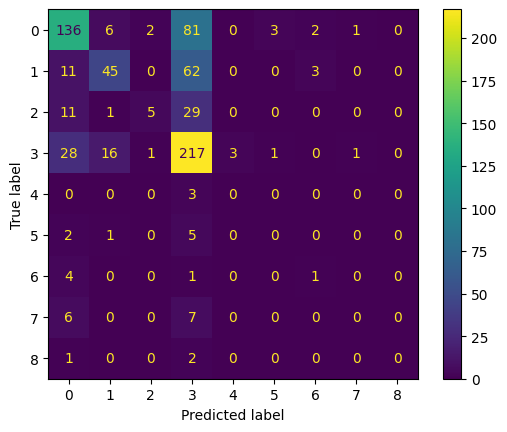

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))